In [194]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd

df = pd.read_csv('Iries_dataset.csv')
df

,label,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Unnamed: 5
0,setosa,5.1,3.5,1.4,0.2,
1,setosa,4.9,3.0,1.4,0.2,
2,setosa,4.7,3.2,1.3,0.2,
3,setosa,4.6,3.1,1.5,0.2,
4,setosa,5.0,3.6,1.4,0.2,
...,...,...,...,...,...,...
146,virginica,6.3,2.5,5.0,1.9,
147,virginica,6.5,3.0,5.2,2.0,
148,virginica,6.2,3.4,5.4,2.3,
149,virginica,5.9,3.0,5.1,1.8,


In [13]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['label']= label_encoder.fit_transform(df['label'])

df['label'].unique()


array([0, 1, 2, 3])

#### 2. Preprocessing
The dataset is perfect already, we do not need to preprocess it. During this phase, it is common to analyze the data to better understand it, but I will leave some analysis for further sections, so you can better understand the flow of the project.


#### 3. Feature and label selection
As usual, I will need to separate features from labels: In two sentences, a supervised AI program (such as this one) is structured in this way: we start from tabular data, in our case, the Titanic Dataset. We divide the columns into two kinds, the columns we wish to predict (labels) and the ones that will act as predictors (features). Once split, then we can train the model.

In [14]:
X=df[list(df.columns[0:4])]
Y=df[['label']]

In [15]:
Y

,label
0,0
1,0
2,0
3,0
4,0
...,...
146,2
147,2
148,2
149,2


In [16]:
Y

,label
0,0
1,0
2,0
3,0
4,0
...,...
146,2
147,2
148,2
149,2


In [17]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

fig = go.Figure()
for feature in list(df.columns[0:4]):
    fig.add_trace(go.Violin(y=df[feature],
        name=feature,
        box_visible=True,
        meanline_visible=True))

fig.show()

In [18]:
import plotly.express as px
df_iris = px.data.iris()
fig = px.parallel_coordinates(df_iris, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

## 4. Train and test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.24)

## 5. Train the model

In [20]:
X_train.fillna(X_train.mean(),inplace=True)
Y_train.fillna(Y_train.mean(),inplace=True)


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
 

DecisionTreeClassifier(random_state=0)

In [22]:
 clf.score(X_test, Y_test)

1.0

### 6. Make a prediction

In [23]:
display(X_test[0:10])

,label,sepal length (cm),sepal width (cm),petal length (cm)
114,2,5.8,2.8,5.1
62,1,6.0,2.2,4.0
33,0,5.5,4.2,1.4
107,2,7.3,2.9,6.3
7,0,5.0,3.4,1.5
100,2,6.3,3.3,6.0
40,0,5.0,3.5,1.3
86,1,6.7,3.1,4.7
76,1,6.8,2.8,4.8
71,1,6.1,2.8,4.0


In [24]:
#show predicted dataset
pd.concat([X_test.reset_index(drop=True), pd.DataFrame(clf.predict(X_test))], axis=1)

,label,sepal length (cm),sepal width (cm),petal length (cm),0
0,2,5.8,2.8,5.1,2
1,1,6.0,2.2,4.0,1
2,0,5.5,4.2,1.4,0
3,2,7.3,2.9,6.3,2
4,0,5.0,3.4,1.5,0
5,2,6.3,3.3,6.0,2
6,0,5.0,3.5,1.3,0
7,1,6.7,3.1,4.7,1
8,1,6.8,2.8,4.8,1
9,1,6.1,2.8,4.0,1


### 7. Visualize decision tree

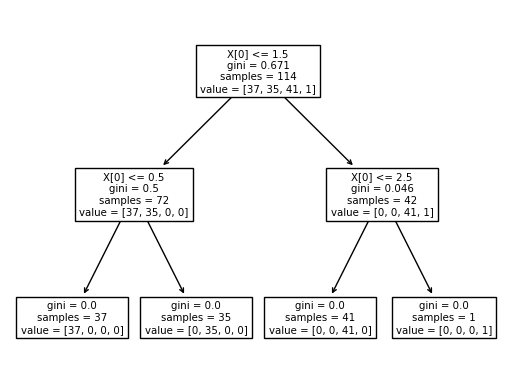

In [25]:
from sklearn import tree
from matplotlib import pyplot as plt

tree.plot_tree(clf)
plt.savefig('out.pdf')
plt.show()